<a href="https://colab.research.google.com/github/VictorCabrejos/render_ai_med_scanner/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thevictor23","key":"c98e5f7f4eb90fed09eef8e9731d5b76"}'}

In [5]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:45<00:00, 59.7MB/s]
100% 2.29G/2.29G [00:45<00:00, 54.3MB/s]


In [6]:
!apt install pv
!unzip -o /content/chest-xray-pneumonia.zip | pv -l >/dev/nul

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  libcublas10 libnvidia-common-430 nsight-compute-2019.5.0
  nsight-systems-2019.5.2
Use 'apt autoremove' to remove them.
Suggested packages:
  doc-base
The following NEW packages will be installed:
  pv
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 48.3 kB of archives.
After this operation, 123 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu b

In [0]:
path = "/content/chest_xray/chest_xray/"

data = ImageDataBunch.from_folder(path+'.', train=path+'.',valid_pct=0.2,ds_tfms=get_transforms(), size=224,num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['NORMAL', 'PNEUMONIA']

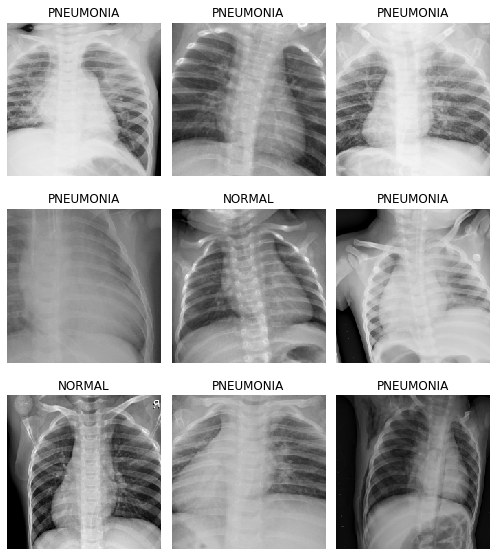

In [10]:
data.show_batch(rows=3, figsize=(7, 8))

In [11]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet34, metrics=error_rate,model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 85.2MB/s]


In [12]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.477322,0.318163,0.080273,03:28
1,0.310262,0.263920,0.081981,03:27
2,0.229349,0.206426,0.080273,03:27
3,0.182403,0.163359,0.058070,03:27


In [0]:
learn.save("model")

In [0]:
# model_save_name = 'classifier2.pt'
# path = f"/content/drive/My Drive/0 - ML MODELS/{model_save_name}" 
# learn.save("model", path)
# learn.path = Path("")
learn.export("model.pkl")
# learn.path